## Reference: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

# Data Importing

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [17]:
data_advertising = pd.read_csv('advertising.csv')

# Description of Variables 
   - TV Spending
   - Radio Spending
   - Newspaper Spending 
   - Sales

## Exploratory Data Analysis

In [18]:
data_advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [19]:
data_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
data_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
data_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


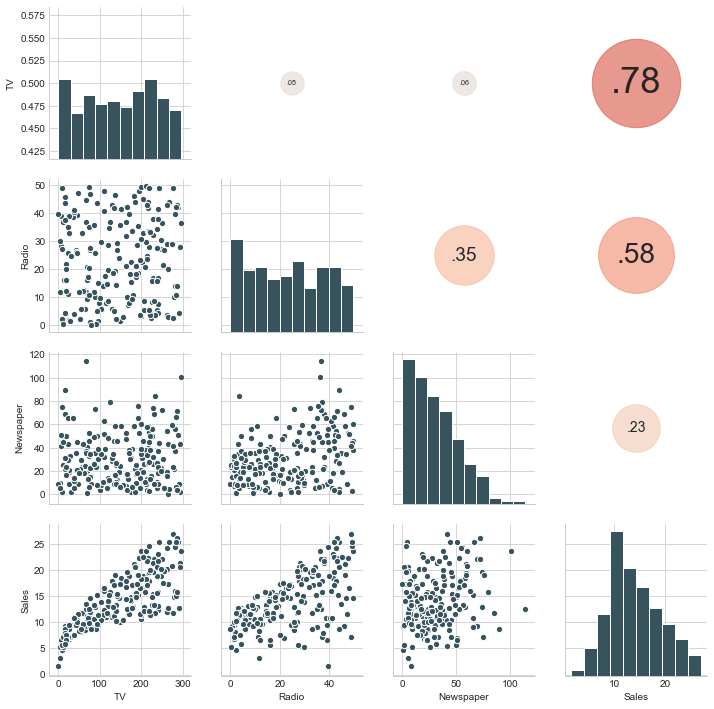

In [22]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

#DV Scatter Plots
g = sns.PairGrid(data_advertising)
g = g.map_diag(plt.hist,edgecolor="w")
g = g.map_lower(plt.scatter,edgecolor="w",s=40)

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
g.map_upper(corrdot)

In [23]:
#DV Scatter Plots - Inference

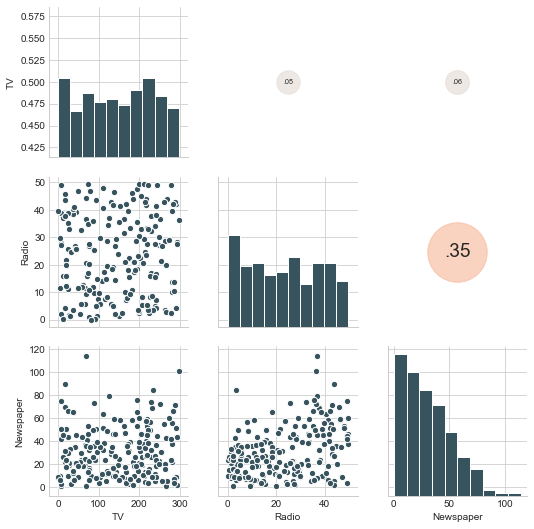

In [24]:
#IV Scatter Plots
g = sns.PairGrid(data_advertising.iloc[:,:3])
g = g.map_diag(plt.hist,edgecolor="w")
g = g.map_lower(plt.scatter,edgecolor="w",s=40)

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
g.map_upper(corrdot)

In [25]:
#IV Scatter Plots - Inference

# Data Preprocessising 
    - Not much to do here (no encoding,imputation etc.)

# Model Building

#Training & Testing Data

In [26]:
y=data_advertising['Sales'] # Yields a dataframe
#Y=data_advertising.iloc[:,3].values

In [27]:
X=data_advertising[['TV','Radio','Newspaper']]

In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
       ... 
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [29]:
#Use cross_validation.train_test_split from sklearn to split the data into training and testing sets. 
#Set test_size=0.3 and random_state=101

In [30]:
from sklearn.cross_validation import train_test_split

C:\Users\Uma_Shankar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Training the Model

In [32]:
#Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [33]:
#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

In [34]:
#Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.04469599  0.1875657  -0.00032275]


In [36]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
TV,0.044696
Radio,0.187566
Newspaper,-0.000323


#Predicting Test Data

In [37]:
#Use lm.predict() to predict off the X_test set of the data
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

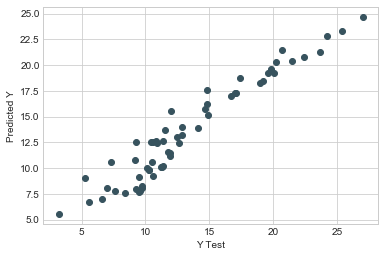

In [38]:
#Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Model Evaluation

#Metrics

In [40]:
#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print('Rsquare:', metrics.rsquare(y_test, predictions))

MAE: 1.2137457736144808
MSE: 2.298716697886379
RMSE: 1.5161519375993882


#Residual Analysis

In [44]:
residue = predictions-y_test

dtype('float64')